# Trabalho Prático 1
## Grupo:
* Gabriel Alves Reis, 
* Gabriel Castelo Branco Rocha Alencar Pinto, 2020006523
* Samuel Brísio, 


In [2]:
# %pip install pandas
# %pip install matplotlib

1- Envoltória Convexa (Gift Wrapping ??)
- Implementar primitiva de posição relativa de semiretas
- Sorted (default do python) com nossa primitiva
- Algoritmo da Envoltória (Gift Wrapping)
    - (conj. de pontos) -> (conj. de pontos)
- função para visualizar a envoltória

In [3]:
# imports

In [4]:
class Dot:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __lt__(self, b):
        A = (self.x)*(b.y)
        B = (self.y)*(b.x)
        return (A - B) > 0
    
    def __sub__(self, b):
        return Dot(self.x - b.x, self.y - b.y)
    
    def __add__(self, b):
        return Dot(self.x + b.x, self.y + b.y)

    def __repr__(self):
        return f'({self.x}, {self.y})'
    
    def __eq__(self, other):
        if(self.x == other.x and self.y == other.x):
            return True
        return False

In [5]:
class Endpoint:
    def __init__(self, dot:Dot, segmentIndx,  endpointType):
        # endpoit type = 'left' | 'right'
        self.dot = dot
        self.segmentIndx = segmentIndx
        self.endpointType = endpointType
    
    def __repr__(self):
        return f'({self.dot}, {self.segmentIndx}, {self.endpointType})'

    def __lt__(self, b):
        if self.dot.x == b.dot.x:
            if self.endpointType == b.endpointType:
                return self.dot.y < b.dot.y
            else:
                return True if self.endpointType == 'left' else False
        else: 
            return self.dot.x < b.dot.x

    def __eq__(self, other):
        if(self.dot == other.dot and self.segmentIndx == other.segmentIndx and self.endpointType == other.endpointType):
            return True
        return False

In [6]:
# Define a classe Seguimento
# O segmento terá um ponto a esquerda, a direita e um rotulo informando a qual poligono pertence

class Segment:
    def __init__(self, left:Dot, right:Dot, label):
        self.left = left
        self.right = right
        self.label = label

    def __repr__(self):
        return f'( {self.left} -> {self.right}, {self.label} )'

    def __eq__(self, other):
        if(self.left == other.left and self.right == other.right and self.label == other.label):
            return True
        return False

In [7]:
def sortDotsByPolarAngle(dotsParam):
    dots = dotsParam.copy()
    anchor = dots[0]
    indx = 0
    anchor_indx = indx
    # find anchor
    for p in dots:
        if p.y < anchor.y :
            anchor = p
            anchor_indx = indx
        elif (p.y == anchor.y and p.x < anchor.x) :
            anchor = p  
            anchor_indx = indx
        indx += 1

    # normalize dots
    norm_dots = []
    dots.pop(anchor_indx)
    for dot in dots:
        norm_dots.append(dot - anchor)
    
    norm_dots.sort()

    sorted_dots = [anchor]
    for dot in norm_dots:
        sorted_dots.append(dot + anchor)

    return sorted_dots

In [39]:
import random
def noise(x):
    return x + random.random() / 100

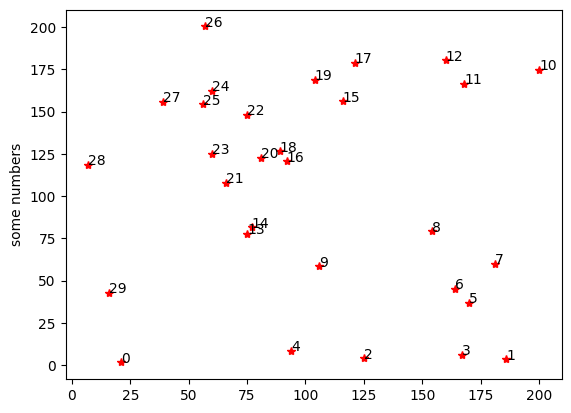

In [9]:
import matplotlib.pyplot as plt
from random import randint 
import random

dot_list = []

random.seed(16)
for i in range(30):
    x = randint(0,200)
    y = noise(randint(0,200))
    a = Dot(x, y)
    dot_list.append(a)

x = []
y = []

for e in sortDotsByPolarAngle(dot_list):
    x.append(e.x)
    y.append(e.y)

fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')
plt.show()


# Envoltória

In [10]:
def isLeftTurn(a, b, c):
    B = b - a
    C = c - a

    term1 = (B.x)*(C.y)
    term2 = (B.y)*(C.x)
    return (term1 - term2) > 0

In [32]:
def Graham(DotListParam):
    DotList = DotListParam.copy()
    stack = []
    stack.append(DotList[0])
    stack.append(DotList[1])
    stack.append(DotList[2])

    for i in range(3, len(DotList), 1):
        laster = len(stack) - 1

        while not isLeftTurn(stack[-2], stack[-1], DotList[i]):
            stack.pop()
            laster -= 1
        stack.append(DotList[i])

    return stack

30
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


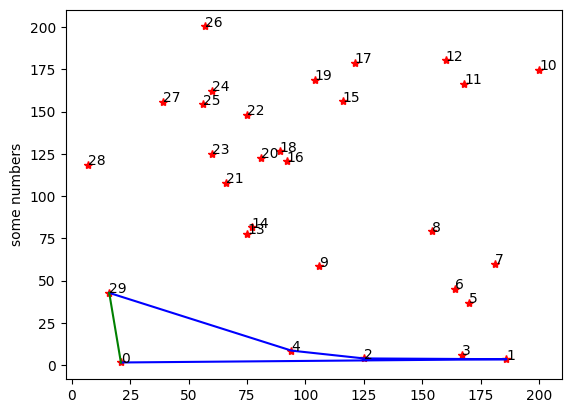

In [12]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')

x_envolt = []
y_envolt = []

sorted_list = sortDotsByPolarAngle(dot_list)

convexEnvelope = Graham(sorted_list)
for e in convexEnvelope:
    x_envolt.append(e.x)
    y_envolt.append(e.y)


ax.plot(x_envolt, y_envolt, 'b-')
ax.plot([x_envolt[len(x_envolt) - 1], x_envolt[0]], [y_envolt[len(y_envolt) - 1], y_envolt[0]], 'g-')
plt.show()

# Varredura

In [13]:
# Verifica se o ponto p3 está na semireta p1p2. 
# p1, p2 e p3 são colineares
def on_segment(p1:Dot, p2:Dot, p3:Dot):
    p1HasLessX = p1.x < p2.x 
    if p1HasLessX and p1.x <= p3.x and p2.x >= p3.x:
        return True
    if p2.x <= p3.x and p1.x >= p3.x:
        return True
    return False

In [14]:
def direction(a, b, c):
    # return 1 if turn left
    # return -1 if turn right
    # return 0 if is co-linear
    
    B = b - a
    C = c - a

    term1 = (B.x)*(C.y)
    term2 = (B.y)*(C.x)
    return (term1 - term2) 

In [15]:
def aux_segments_intersect(p1, p2, p3, p4):
    d1 = direction(p3, p4, p1)
    d2 = direction(p3, p4, p2)
    d3 = direction(p1, p2, p3)
    d4 = direction(p1, p2, p4)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and ((d3 > 0 and d4 < 0) or  (d3 < 0 and d4 > 0)):
        return True
    if d1 == 0 and on_segment(p3, p4, p1):
        return True
    if d2 == 0 and on_segment(p3, p4, p2):
        return True
    if d3 == 0 and on_segment(p1, p2, p3):
        return True
    if d4 == 0 and on_segment(p1, p2, p4):
        return True
        
    return False

In [16]:
def segments_intersect(s1:Segment, s2:Segment):
    return aux_segments_intersect(s1.left, s1.right, s2.left, s2.right)

In [17]:
def isAbove(avl, key):
    if avl.__contains__(key):
        try:
            segment = avl.succ_item(key)[1] 
            return (True, segment)
        except:
            return False, 'error'
    else:
        try:
            segment = avl.ceiling_item(key)[1]
            return (True, segment)
        except:
            return False, 'error'

In [18]:
def isBelow(avl, key):
    if avl.__contains__(key):
        try:
            segment = avl.prev_item(key)[1] 
            return (True, segment)
        except:
            return False, 'error'
    else:
        try:
            segment = avl.floor_item(key)[1]
            return (True, segment)
        except:
            return False, 'error'
    

In [19]:
import bintrees

def sweepLineIntersection(endpoitsList, segmentsList):
    avl = [bintrees.AVLTree(), bintrees.AVLTree()]

    for p in endpoitsList:

        s = segmentsList[p.segmentIndx]

        # print(20 * '-')
        # print(avl[0])
        # print(avl[1])
        # print(s, '\t', p.segmentIndx)

        # Insere o segmento na arvore
        if p.endpointType == 'left':

            # Insere o segmento na arvore
            if avl[s.label].__contains__(s.left.y):
                itemList = avl[s.label].get(s.left.y)
                itemList.append(s)
                avl[s.label].insert(s.left.y, itemList)
            else:
                avl[s.label].insert(s.left.y, [s])

            aboveExist, otherSegments = isAbove(avl[s.label - 1], s.left.y)
            if (aboveExist):
                for other in otherSegments:
                    hasIntersection = segments_intersect(s, other)
                    # print("above has Intersect: ", hasIntersection)
                    if (hasIntersection):
                        return True
            
            belowExist, otherSegments = isBelow(avl[s.label - 1], s.left.y)
            if (belowExist):
                for other in otherSegments:
                    hasIntersection = segments_intersect(s, other)
                    # print("below has Intersect: ", hasIntersection)
                    if (hasIntersection):
                        return True
            
            # print("isAbove: ", aboveExist, "\t isBelow: ", belowExist)
            # print()

        
        else:
            aboveExistOther, aboveSegmentsOther = isAbove(avl[s.label - 1], s.right.y)
            belowExistOther, belowSegmentsOther = isBelow(avl[s.label - 1], s.right.y)

            aboveExist, aboveSegments = isAbove(avl[s.label], s.right.y)
            belowExist, belowSegments = isBelow(avl[s.label], s.right.y)

            # print("aboveExist: ", aboveExist)
            # print("belowExist: ", aboveExist)
            # print("aboveExistOther: ", aboveExistOther)
            # print("belowExistOther: ", belowExistOther)


            if (aboveExist and belowExistOther):
                for aboveSegment in aboveSegments:
                    for belowSegment in belowSegmentsOther:
                        hasIntersection = segments_intersect(aboveSegment, belowSegment)    
                        if(hasIntersection):
                            return True


            if (aboveExistOther and belowExist):
                for aboveSegment in aboveSegmentsOther:
                    for belowSegment in belowSegments:
                        hasIntersection = segments_intersect(aboveSegment, belowSegment)    
                        if(hasIntersection):
                            return True

            
            # remoção do segmento
            itemList = avl[s.label].get(s.left.y)
            if len(itemList) > 1:
                 for i in range(len(itemList) - 1):
                    if(itemList[i] != s):
                        continue
                    itemList.pop(i)

            else:
                avl[s.label].pop(s.left.y, False)

    return False



# Teste

Envoltoria 1

In [20]:
def EnvoltoriaAleatoria(seed=12, numDots=20, x_inicial=0, x_final=100, y_inicial=0, y_final=100):
    dot_list = []

    random.seed(seed)
    for i in range(numDots):
        x = randint(x_inicial, x_final)
        y = noise(randint(y_inicial,y_final))
        a = Dot(x, y)
        dot_list.append(a)

    sorted_list = sortDotsByPolarAngle(dot_list)

    return  (dot_list, Graham(sorted_list))

def plotEnvoltoria(ax, pontos, envoltoria, dotType='r*', envType='b-'):
    
    for i in range(len(pontos)):
        ax.plot(pontos[i].x, pontos[i].y, dotType)
    
    lista_Envoltoria = [[], []]

    for e in envoltoria:
        lista_Envoltoria[0].append(e.x)
        lista_Envoltoria[1].append(e.y)
    
    ax.plot(lista_Envoltoria[0], lista_Envoltoria[1], envType)
    ax.plot([lista_Envoltoria[0][len(lista_Envoltoria[0]) - 1], lista_Envoltoria[0][0]], [lista_Envoltoria[1][len(lista_Envoltoria[1]) - 1], lista_Envoltoria[1][0]], envType)
 

In [21]:
def preProcessConvexHull(EnvoltoriaA, EnvoltoriaB):
    
    endpoitsList:Endpoint = []
    segmentsList:Segment = []

    for i in range(len(EnvoltoriaA) - 1):
        dotA = EnvoltoriaA[i]
        dotB = EnvoltoriaA[i + 1]

        left = dotA if dotA.x < dotB.x else dotB
        right = dotA if dotA.x >= dotB.x else dotB

        endpoitsList.append(Endpoint(left, segmentIndx=i, endpointType='left'))
        endpoitsList.append(Endpoint(right, segmentIndx=i, endpointType='right'))

        segmentsList.append(Segment(left, right, 0))

    pn = EnvoltoriaA[-1]
    p0 = EnvoltoriaA[0]

    
    left = pn if pn.x < p0.x else p0
    right = pn if pn.x >= p0.x else p0

    segmentMax = len(segmentsList)

    endpoitsList.append(Endpoint(left, segmentIndx=segmentMax, endpointType='left'))
    endpoitsList.append(Endpoint(right, segmentIndx=segmentMax, endpointType='right'))
    segmentsList.append(Segment(left, right, 0))


    for j in range(len(EnvoltoriaA), len(EnvoltoriaA) + len(EnvoltoriaB) - 1):
        i = j - len(EnvoltoriaA)
        dotA = EnvoltoriaB[i]
        dotB = EnvoltoriaB[i + 1]

        left = dotA if dotA.x < dotB.x else dotB
        right = dotA if dotA.x >= dotB.x else dotB

        endpoitsList.append(Endpoint(left, segmentIndx=j, endpointType='left'))
        endpoitsList.append(Endpoint(right, segmentIndx=j, endpointType='right'))

        segmentsList.append(Segment(left, right, 1))
    

    pn = EnvoltoriaB[-1]
    p0 = EnvoltoriaB[0]
    left = pn if pn.x < p0.x else p0
    right = pn if pn.x >= p0.x else p0

    segmentMax = len(segmentsList)

    endpoitsList.append(Endpoint(left, segmentIndx=segmentMax, endpointType='left'))
    endpoitsList.append(Endpoint(right, segmentIndx=segmentMax, endpointType='right'))
    segmentsList.append(Segment(left, right, 1))

    endpoitsList.sort()
    
    return (endpoitsList, segmentsList)


In [22]:
def testTo(n:int):
    nPoints = 6
    fig, ax = plt.subplots(n)
    fig.set_figheight(2*n)
    plt.subplots_adjust(hspace=0.5)

    for i in range(n):
        (pontosA, EnvoltoriaA) = EnvoltoriaAleatoria(i+1, numDots=nPoints)
        (pontosB, EnvoltoriaB) = EnvoltoriaAleatoria(i+3, nPoints, 30, 200, 50, 200)

        plotEnvoltoria(ax[i], pontosA, EnvoltoriaA)
        plotEnvoltoria(ax[i], pontosB, EnvoltoriaB, dotType='go', envType='y-')

        endPointList, segmentsList = preProcessConvexHull(EnvoltoriaA= EnvoltoriaA, EnvoltoriaB= EnvoltoriaB)

        isIntercect = (sweepLineIntersection(endPointList, segmentsList))
        ax[i].set_title(isIntercect)

    plt.show()

# testTo(15)

# Integração com BD

In [23]:
# %pip install pandas

# Banana BD

In [43]:
import pandas as pd
def plotClass(List, ax, dotType='r*', envType='b-', compareCol1=1, compareCol2=2):
    # Recebe uma tabela com duas colunas referentes ao x e y da classe

    x = []
    y  = []
    dot_list = []
    for row in List.itertuples():
        a = row[compareCol1]
        b = row[compareCol2]
        a = noise(a)
        b = noise(b)
        dot = Dot(a, b)
        x.append(a)
        y.append(b)
        dot_list.append(dot)

    sorted_list = sortDotsByPolarAngle(dot_list)
    env = Graham(sorted_list)
    plotEnvoltoria(ax, dot_list, env, dotType=dotType, envType=envType)

In [25]:
import pandas as pd

banana = pd.read_csv('./data/banana.csv', delimiter=',')

aType = banana[banana['Class'] == 1]
bType = banana[banana['Class'] == -1]

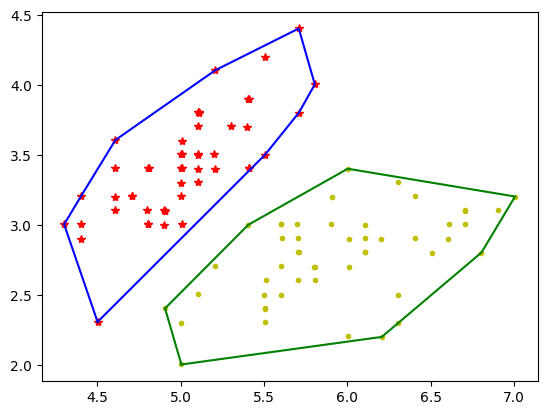

In [45]:
fig, ax = plt.subplots()
plotClass(aType, ax)
plotClass(bType, ax, dotType='y.', envType='g-')


# Iris BD

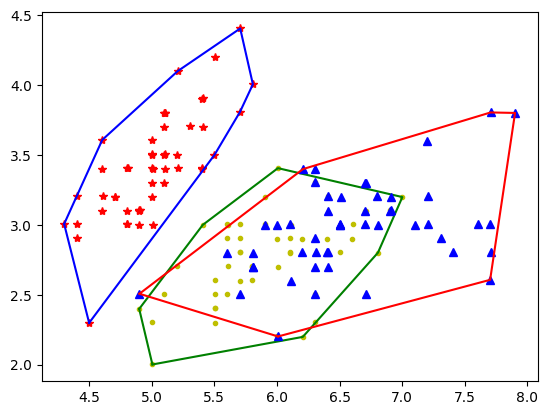

In [44]:
import pandas as pd

iris = pd.read_csv('./data/iris.csv', delimiter=',')

aType = iris[iris['Class'] == 'Iris-setosa']
bType = iris[iris['Class'] == 'Iris-versicolor']
cType = iris[iris['Class'] == 'Iris-virginica']

fig, ax = plt.subplots()

plotClass(aType, ax)
plotClass(bType, ax, dotType='y.', envType='g-')
plotClass(cType, ax, dotType='b^', envType='r-')

# wine quality

1457

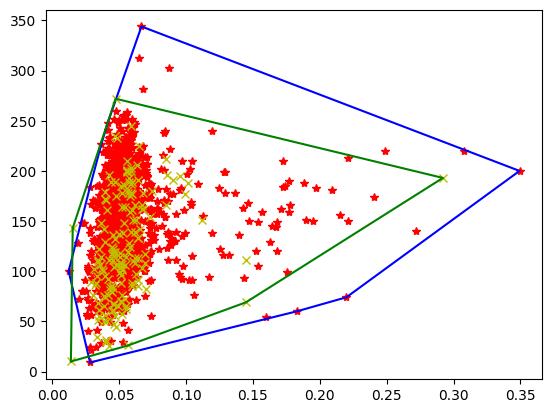

In [49]:
wine = pd.read_csv('./data/winequality-white.csv', delimiter=',')

aType = wine[wine['Quality'] == 5]
bType = wine[wine['Quality'] == 4]

fig, ax = plt.subplots()

plotClass(aType, ax, compareCol1=5, compareCol2=7)
plotClass(bType, ax, compareCol1=5, compareCol2=7, dotType='yx', envType='g-')

# CitricAcid X Alcool
len(aType)

# Thyroid

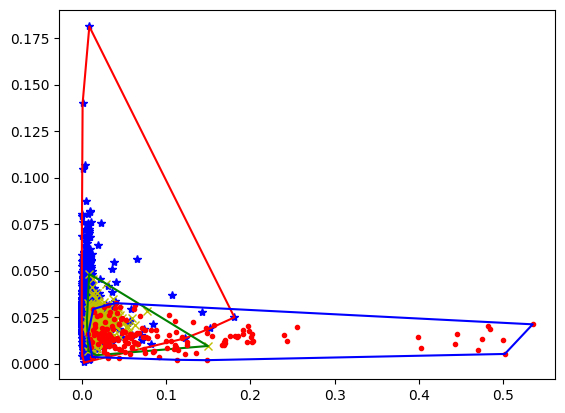

In [51]:
thyroid = pd.read_csv('./data/thyroid.csv', delimiter=',')

aType = thyroid[thyroid['Class'] == 3][['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']] # hipo
bType = thyroid[thyroid['Class'] == 2][['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']] # hyper
cType = thyroid[thyroid['Class'] == 1][['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']] # normal

fig, ax = plt.subplots()

a = 1
b = 2
plotClass(aType, ax, dotType='b*', envType='r-', compareCol1=a, compareCol2=b)
plotClass(bType, ax, dotType='yx', envType='g-', compareCol1=a, compareCol2=b)
plotClass(cType, ax, dotType='r.', envType='b-', compareCol1=a, compareCol2=b)




# Phoneme


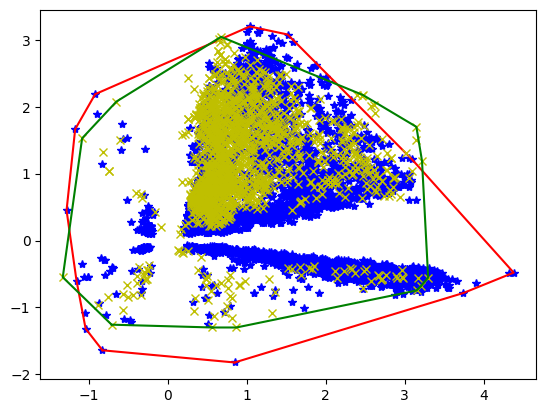

In [ ]:
phoneme = pd.read_csv('./data/phoneme.csv', delimiter=',')

aType = phoneme[phoneme['Class'] == 0]
bType = phoneme[phoneme['Class'] == 1]

fig, ax = plt.subplots()

a = 2
b = 3

plotClass(aType, ax, dotType='b*', envType='r-', compareCol1=a, compareCol2=b)
plotClass(bType, ax, dotType='yx', envType='g-', compareCol1=a, compareCol2=b)

plt.show()

# Breast Cancer Wisconsin

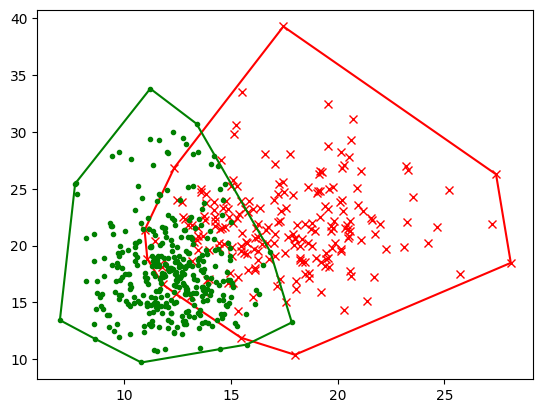

In [48]:
import numpy as np

cancer = pd.read_csv('./data/wdbc.csv', delimiter=',')

aType = cancer[cancer['Class'] == 'M']
bType = cancer[cancer['Class'] == 'B']

col = (aType.shape)[1]

for i in range(col):
    for j in range(col):

        fig, ax = plt.subplots()
        plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=i, compareCol2=j)
        plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=i, compareCol2=j)



fig, ax = plt.subplots()
a = 1
b = 2

plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=a, compareCol2=b)
plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=a, compareCol2=b)

# plt.show()

# Ionosphere

In [ ]:
ionosphere.columns

Index(['Pulse1', 'Pulse3', 'Pulse4', 'Pulse5', 'Pulse6', 'Pulse7', 'Pulse8',
       'Pulse9', 'Pulse10', 'Pulse11', 'Pulse12', 'Pulse13', 'Pulse14',
       'Pulse15', 'Pulse16', 'Pulse17', 'Pulse18', 'Pulse19', 'Pulse20',
       'Pulse21', 'Pulse22', 'Pulse23', 'Pulse24', 'Pulse25', 'Pulse26',
       'Pulse27', 'Pulse28', 'Pulse29', 'Pulse30', 'Pulse31', 'Pulse32',
       'Pulse33', 'Pulse34', 'Class', 'Unnamed: 34'],
      dtype='object')

In [ ]:
ionosphere = pd.read_csv('./data/ionosphere.csv', delimiter=',')

aType = ionosphere[ionosphere['Class'] == 'b']
bType = ionosphere[ionosphere['Class'] == 'g']


# fig, ax = plt.subplots()
# a = 24
# b = 15

# plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=a, compareCol2=b)
# plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=a, compareCol2=b)

# plt.show()

aType[['Pulse24', 'Pulse27']]

,Pulse24,Pulse27
1,-0.357,-0.205
2,0.000,0.516
4,0.009,-0.032
6,0.000,1.000
8,0.000,0.206
...,...,...
336,0.178,0.258
337,1.000,1.000
338,1.000,1.000
339,-1.000,1.000
